# MNIST Handwritten digits

A neural network that recognized MNIST handwritten digits.

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from nn_mnist_model import MNISTModel, run_tensorboard
%matplotlib inline
%load_ext tensorboard

In [2]:
print("TensorFlow version:{}".format(tf.__version__))

TensorFlow version:2.7.0


## MNist model instantiation

We have prepared a Python class to easily load and manage the MNIST dataset and model.

In [3]:
mnist_model = MNISTModel(
    epochs=200,
    batch_size=128
)

Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2022-02-17 17:57:46.016406: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-17 17:57:46.016509: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## Load the MNIST dataset

The data is downloaded from the keras dataset. The dependent variable (y_train ans Y_test) is transformed as One-hot
representation of the labels.

In [4]:

# load data
mnist_model.load_data()
print("{} train samples. Each sample is a flaten vector of {} elements".format(mnist_model.X_train.shape[0],mnist_model.X_train.shape[1] ))
print("{} test samples".format(mnist_model.X_test.shape[0]))
print("{} Labels are One-hot encodded as columns".format(mnist_model.Y_train.shape[1]))

60000 train samples. Each sample is a flaten vector of 784 elements
10000 test samples
10 Labels are One-hot encodded as columns


## Print some sample images from the MNIST dataset

The data is loaded  and splited in `(mnist_model.X_train, mnist_model.Y_train),` for model traning and 
`(mnist_model.X_test, mnist_model.Y_test)` for model validation.

With the `mnist_model.get_sample_images()` function we can get a random sample of images from the train data.

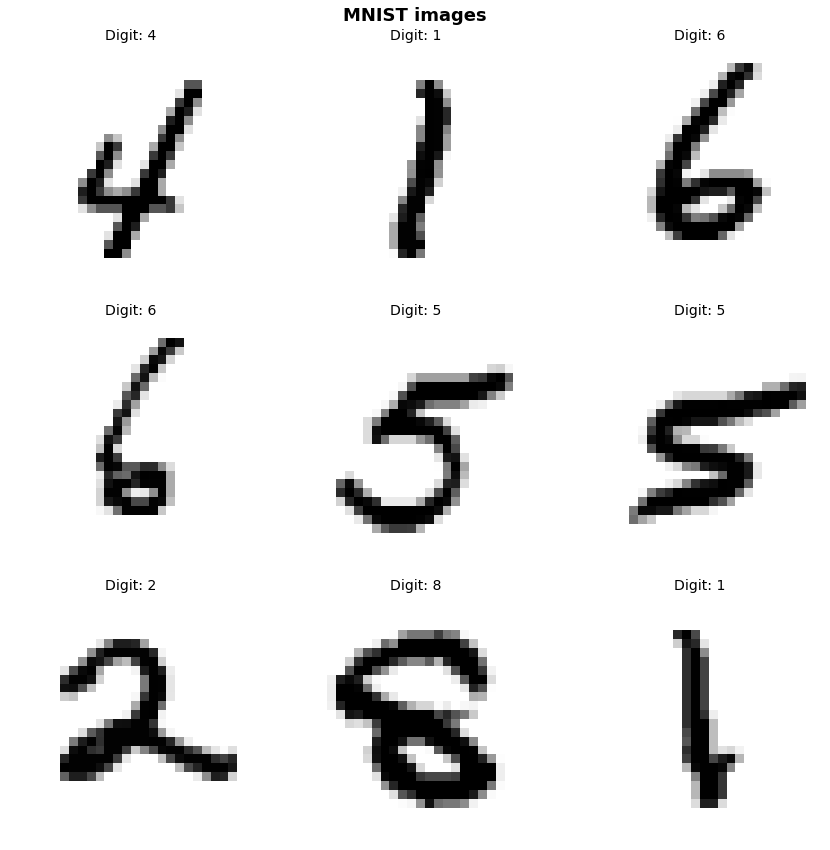

In [5]:
fig, axs = mnist_model.get_sample_images()

## Build the model

With no hidden layers, the model by default will be uilt with one Dense layer with 10 units, connected to the input layer (with shape of 784) and  `softmax` activation.

In [6]:
# Build the model.
mnist_model.build()
# Summary of the model
mnist_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


## Cpmpile the Model

By default, the optimizer is **SGD**, loss `categorical_crossentropy` and metrics `[accuracy]`.

In [7]:
# Compiling the model.
mnist_model.compile()

## Train Mode

In [9]:
# Training the model.
mnist_model.fit()

2022-02-17 17:59:07.682961: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-02-17 17:59:07.848911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/200
464/469 [============================>.] - ETA: 0s - loss: 1.2721 - accuracy: 0.7013

2022-02-17 17:59:11.501211: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 4s 9ms/step - loss: 1.2681 - accuracy: 0.7023 - val_loss: 0.8102 - val_accuracy: 0.8292
Epoch 2/200
469/469 [==============================] - 4s 8ms/step - loss: 0.7162 - accuracy: 0.8376 - val_loss: 0.6093 - val_accuracy: 0.8562
Epoch 3/200
469/469 [==============================] - 3s 7ms/step - loss: 0.5889 - accuracy: 0.8570 - val_loss: 0.5279 - val_accuracy: 0.8724
Epoch 4/200
469/469 [==============================] - 4s 7ms/step - loss: 0.5274 - accuracy: 0.8676 - val_loss: 0.4822 - val_accuracy: 0.8796
Epoch 5/200
469/469 [==============================] - 3s 7ms/step - loss: 0.4897 - accuracy: 0.8741 - val_loss: 0.4524 - val_accuracy: 0.8848
Epoch 6/200
469/469 [==============================] - 4s 8ms/step - loss: 0.4637 - accuracy: 0.8789 - val_loss: 0.4309 - val_accuracy: 0.8890
Epoch 7/200
469/469 [==============================] - 4s 8ms/step - loss: 0.4444 - accuracy: 0.8821 - val_loss: 0.4146 - val_accuracy: 0.8915
Epoch 8/200

# Evaluate Model

In [10]:
#evaluate the model
test_loss, test_acc = mnist_model.evaluate()
print('Test accuracy:', test_acc)


313/313 [==============================] - 2s 6ms/step - loss: 0.2728 - accuracy: 0.9232
Test accuracy: 0.9232000708580017


## Launch TensorBoard


In [5]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6007 (pid 74730), started 0:00:28 ago. (Use '!kill 74730' to kill it.)